In [1]:
!pip install xgboost

DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anaconda3\lib\site-packages\aiofiles-23.2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anaconda3\lib\site-packages\anyio-3.7.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anaconda3\lib\site-packages\boto3-1.26.105-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nishchal22330\appdata\local\anac

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import joblib
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('creditCardFraud_28011964_120214.csv')

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

## All features are interger data type no object datatype present

In [6]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Dataset has no Missing values

## Descriptive Statistics

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,167532.467532,1.589411,1.776224,1.604396,34.945055,-0.004995,-0.161838,-0.164835,-0.283716,-0.283716,...,40748.408591,39078.666334,38012.011988,5382.339660,5051.400599,4176.149850,4671.488511,5331.049950,5090.704296,0.213786
std,130587.921320,0.492187,0.750916,0.532298,9.219760,1.173446,1.228732,1.262459,1.184662,1.170224,...,68206.929510,63108.238729,63074.415024,12180.755275,15626.153184,10514.647502,13269.943983,16812.536877,23658.888052,0.410183
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3684.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1423.000000,1206.000000,830.000000,1000.000000,390.000000,228.000000,148.000000,189.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17710.000000,17580.000000,15846.000000,2184.000000,1710.000000,1206.000000,1398.000000,1306.000000,1250.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48851.000000,46404.000000,46557.000000,5090.000000,4500.000000,3720.000000,4000.000000,3745.000000,3784.000000,0.000000
max,700000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,628699.000000,484612.000000,473944.000000,199646.000000,285138.000000,133657.000000,188840.000000,195599.000000,528666.000000,1.000000


In [8]:
df['SEX'].value_counts()

SEX
2    590
1    411
Name: count, dtype: int64

In [9]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [10]:
df['AGE'].unique()

array([57, 37, 29, 23, 28, 35, 34, 51, 41, 30, 24, 49, 39, 26, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21], dtype=int64)

In [11]:
df.duplicated().sum()

0

## Dataset has no duplicated data

In [12]:
if not os.path.exists('pair_plots'):
    os.makedirs('pair_plots')
for column in df.columns:
    if column != 'default payment next month': 
        sns.pairplot(df, hue='default payment next month', vars=[column], diag_kind='kde')
        plt.title(f'Pair Plot of {column}')
        plt.savefig(os.path.join('pair_plots', f'{column}_pair_plot.png'))
        plt.close()

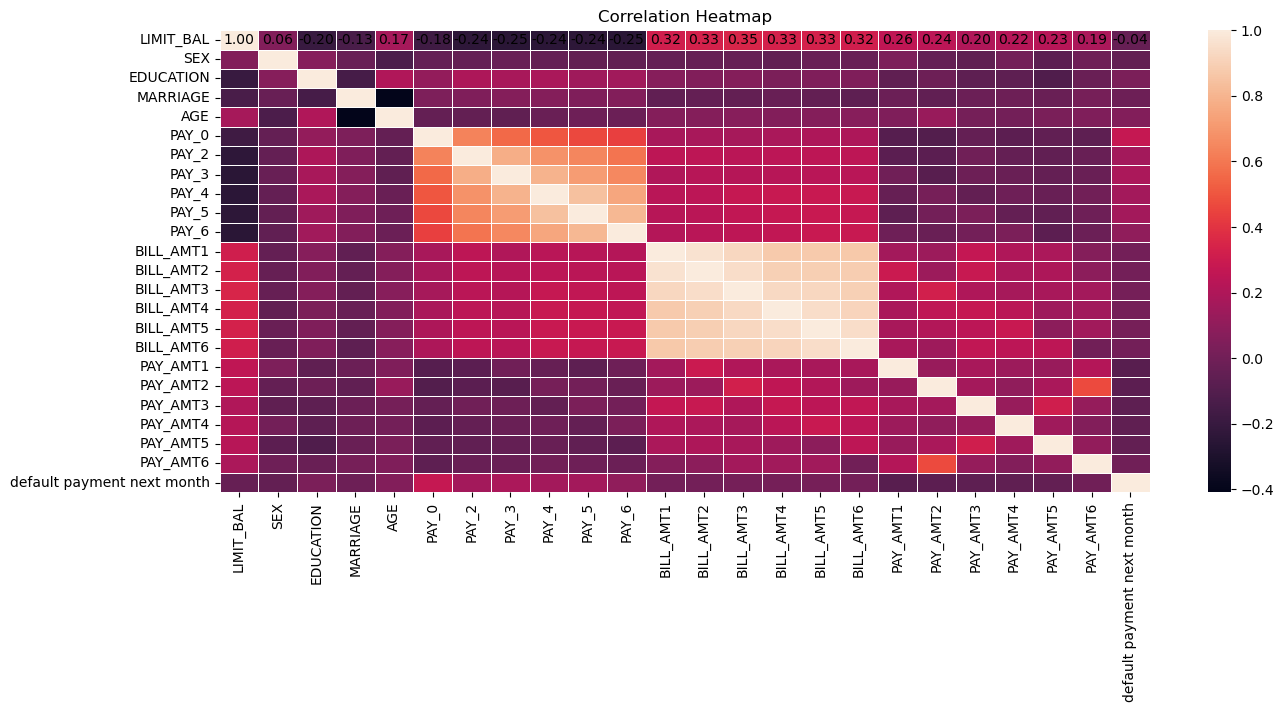

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 10, "color": 'black'})
plt.title('Correlation Heatmap')
plt.show()


From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent. 

But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation. 


## Train Test Split and Standard Scaling

In [14]:
X=df.drop(labels=['default payment next month'],axis=1)
y=df['default payment next month']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [17]:
X_train_scaled=train_scaler.fit_transform(X_train)
X_test_Scaled=test_scaler.fit_transform(X_test)

In [18]:
scaled_train_df=pd.DataFrame(data=X_train_scaled, columns=X_train.columns, index=X_train.index)

In [19]:
scaled_test_df=pd.DataFrame(data=X_test_Scaled, columns=X_test.columns, index=X_test.index)

In [20]:
scaled_train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
311,-0.827063,-1.187465,0.287024,0.730441,-1.282089,-0.031171,0.115654,0.105611,0.225653,0.220334,...,-0.176369,-0.360048,-0.340346,-0.309805,-0.305588,-0.184075,-0.348399,-0.294666,-0.195700,-0.177211
765,0.239455,0.842130,-1.030140,-1.151849,0.006733,-1.701941,-1.465732,-1.466817,-1.463595,-1.476489,...,-0.630462,-0.569559,-0.612888,-0.614997,-0.103300,-0.202343,-0.165886,-0.364653,-0.306803,-0.203779
630,-0.446164,-1.187465,1.604187,-1.151849,2.262170,-0.031171,0.115654,0.105611,0.225653,0.220334,...,-0.176218,-0.173591,-0.266578,-0.244778,-0.119159,-0.215453,-0.279526,-0.176838,-0.129149,0.010829
0,-0.903243,-1.187465,0.287024,-1.151849,2.369572,-0.866556,0.115654,-0.680603,0.225653,0.220334,...,-0.155442,-0.308208,-0.319868,-0.313196,-0.302945,1.718397,0.574694,0.413945,-0.268528,-0.174494
316,-0.446164,-1.187465,0.287024,0.730441,-0.637678,0.804214,1.697039,1.678039,0.225653,0.220334,...,0.065414,0.083910,0.119615,0.141737,-0.258893,-0.293788,-0.212424,-0.191632,-0.203810,-0.117521


## Model Training and Evaluation

In [21]:
gnb_clf=GaussianNB()

In [22]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
grid = GridSearchCV(estimator=gnb_clf, param_grid=param_grid, cv=5,  verbose=3)

In [23]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.299 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.769 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.694 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.679 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.679 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.1;, score=0.321 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.776 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.731 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.679 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.299 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [24]:
grid.best_estimator_

GaussianNB(var_smoothing=0.5)

In [25]:
gnb_clf_new=GaussianNB(var_smoothing=0.5)
y_pred=gnb_clf_new.fit(X_train_scaled,y_train).predict(X_test_Scaled)

In [26]:
print(accuracy_score(y_test,y_pred))

0.797583081570997


In [27]:
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                "max_depth": range(3, 11, 1),
                "random_state":[0,50,100]
    

}

# Creating an object of the Grid Search class
grid2= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [28]:
grid2.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...t=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [29]:
grid2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [30]:
y_pred2=grid2.best_estimator_.predict(X_test_Scaled)

In [31]:
print(accuracy_score(y_test,y_pred2))

0.8066465256797583


In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [33]:
rf_clf=RandomForestClassifier(random_state=42)

In [34]:
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [35]:
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [36]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [37]:
best_rf_clf = grid_search.best_estimator_

In [38]:
y_pred3=best_rf_clf.predict(X_test_Scaled)

In [39]:
print(accuracy_score(y_test, y_pred3))

0.8096676737160121


In [40]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_sr=GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3, scoring='accuracy')
grid_sr.fit(X_train_scaled,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [41]:
best_params = grid_sr.best_params_

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

best_rf_classifier.fit(X_train_scaled, y_train)

y_pred = best_rf_classifier.predict(X_test_Scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest model with best parameters: {accuracy:.2f}')

Accuracy of the Random Forest model with best parameters: 0.82


In [46]:
joblib.dump(best_rf_classifier, 'Random_forest_clf_d2.pkl')

['Random_forest_clf_d2.pkl']

In [42]:
y_pred_l=[y_pred,y_pred2,y_pred3]
for i in y_pred_l:
    print(f'classification Report :\n{ classification_report(y_test,i)}')
print()

classification Report :
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       271
           1       0.53      0.15      0.23        60

    accuracy                           0.82       331
   macro avg       0.68      0.56      0.57       331
weighted avg       0.78      0.82      0.78       331

classification Report :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       271
           1       0.43      0.22      0.29        60

    accuracy                           0.81       331
   macro avg       0.64      0.58      0.59       331
weighted avg       0.77      0.81      0.78       331

classification Report :
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       271
           1       0.42      0.13      0.20        60

    accuracy                           0.81       331
   macro avg       0.63      0.55      0.55       331
we